## Modeling Questions

In [1]:
# importing the data into pandas dataframe
import pandas as pd
myDataframe = pd.read_excel("ModelingDataSet.xlsx" , sheet_name = "Transactions")
myDataframe.head()

,Transaction_ID,Unit_cost,Quantity,Extended_cost,Revenue,Margin%
0,1,0.261167,1200,313.40,468.00,0.330341
1,2,1.073075,400,429.23,572.00,0.249597
2,3,0.109778,2880,316.16,662.88,0.523050
3,4,0.007200,24000,172.80,288.00,0.400000
4,5,0.012630,10000,126.30,320.00,0.605312


In [15]:
# geting the type of data in different columns 
print (myDataframe.dtypes)

Transaction_ID      int64
Unit_cost         float64
Quantity            int64
Extended_cost     float64
Revenue           float64
Margin%           float64
dtype: object


In [31]:
# geting the exact name of each column
list(myDataframe.columns.values)

[u'Transaction_ID',
 u'Unit_cost',
 u'Quantity',
 u'Extended_cost ',
 u'Revenue',
 u'Margin%']

In [34]:
# printing out the descriptive statistics to get some sense about the data
myDataframe.describe()

,Transaction_ID,Unit_cost,Quantity,Extended_cost,Revenue,Margin%
count,28103.000000,28103.000000,28103.000000,28103.000000,28103.000000,28103.000000
mean,14052.000000,0.210462,5556.689820,276.245760,381.811127,0.411105
std,8112.781644,0.473328,16631.417435,622.663652,790.691345,0.217018
min,1.000000,0.000008,5.000000,0.020000,4.890000,0.091326
25%,7026.500000,0.025100,200.000000,22.500000,57.750000,0.178685
50%,14052.000000,0.109778,1150.000000,86.400000,150.000000,0.443076
75%,21077.500000,0.249111,5000.000000,310.650000,427.200000,0.610069
max,28103.000000,45.849321,600000.000000,21634.120000,28938.000000,0.999927


In [18]:
# geting the missing values for margin and extended cost
num_missing_Margin = (pd.isnull(myDataframe['Margin%']).values.ravel().sum())
print "the number of missing Margin% values: " + str(num_missing_Margin)
num_missing_Extended_cost= (pd.isnull(myDataframe['Extended_cost ']).values.ravel().sum())
print "the number of missing Extended_cost values: " + str(num_missing_Extended_cost)

the number of missing Margin% values: 0
the number of missing Extended_cost values: 0


In [30]:
# geting the correlation table for all the columns
myDataframe.corr()

,Transaction_ID,Unit_cost,Quantity,Extended_cost,Revenue,Margin%
Transaction_ID,1.000000,0.007695,-0.020206,-0.014635,-0.012404,0.020919
Unit_cost,0.007695,1.000000,-0.113473,0.117088,0.122623,-0.011095
Quantity,-0.020206,-0.113473,1.000000,0.370578,0.391493,-0.174281
Extended_cost,-0.014635,0.117088,0.370578,1.000000,0.975273,-0.371363
Revenue,-0.012404,0.122623,0.391493,0.975273,1.000000,-0.299550
Margin%,0.020919,-0.011095,-0.174281,-0.371363,-0.299550,1.000000


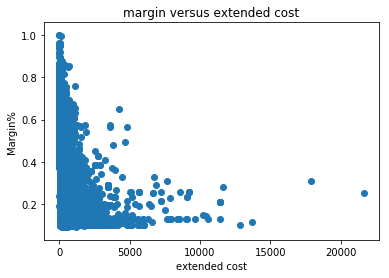

In [24]:
# scatter plot of extended cost and margin to get sense of their relationship
import matplotlib.pyplot as plt
plt.scatter(myDataframe['Extended_cost '] , myDataframe['Margin%'])
plt.xlabel("extended cost")
plt.ylabel("Margin%")
plt.title("margin versus extended cost")
plt.show()

In [33]:
# printing out the row with the max extended cost which looks like an outlier!
myDataframe.loc[myDataframe['Extended_cost '].idxmax()]

26527


Transaction_ID    26528.000000
Unit_cost             1.188815
Quantity          18200.000000
Extended_cost     21634.120000
Revenue           28938.000000
Margin%               0.252397
Name: 26527, dtype: float64

In this section because we dont have enough information about the data, we cannot decide whether to remove the points that look like outliers or not so we won't remove the outliers

# Clustering based on the extended cost
In this section, I wrote a function to get different parameters as the number of bins(clusters) (n=3,4,5,...10), and clustered the extended cost with different number of clusters using Kmeans clustering algorithm. 
In order to decide about the best number of clusters(bins) I calculated the variance of margins within the bins and the difference of the average of Margins between the bins. The goal is to maximize the difference of the average margins across the bins and minimize the variance of margins within each bins.


In [39]:
# clustering based on extended cost using k-means algorithm with (number of clusters = n)
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import itertools
    
def kmeans_clustering (n):
    Y= np.array(myDataframe['Extended_cost '])
    X=Y.reshape(-1, 1)

    # Number of clusters
    kmeans = KMeans(n_clusters=n)

    # Fitting the input data
    kmeans = kmeans.fit(X)

    # Getting the cluster labels
    labels = kmeans.predict(X)
    # adding the labels column to the dataframe
    myDataframe['labels_3bins'] = labels

    # Centroid values
    centroids = kmeans.cluster_centers_
    print ("centroids are : " + str(centroids))
    

    #get the minimum value of each bin
    print "min of each bin : " + str(myDataframe.groupby('labels_3bins')['Extended_cost '].min())
    #get the maximum value of each bin
    print "max of each bin : " + str(myDataframe.groupby('labels_3bins')['Extended_cost '].max())
    
    #calculate the difference between the margin average of each cluster(bin) 
    averageOfBin = []
    averageOfBin = myDataframe.groupby('labels_3bins')['Margin%'].mean().sort_values()
    #averageOfBins_ordered = averageOfBin.order()
    SumOfdiff_between_bins = 0
    for i in range(len(averageOfBin)):
        if (i>0):
            SumOfdiff_between_bins = SumOfdiff_between_bins + abs(averageOfBin[i]-averageOfBin[i-1])
    avgOfDiff_between_bins = SumOfdiff_between_bins/(len(averageOfBin)-1)

    
    #calculate the average of between bins variance
    averageOfVariance = myDataframe.groupby('labels_3bins')['Margin%'].var().mean()

    print "Average of each bin for " + str(n)+ " bins: " + str((myDataframe.groupby('labels_3bins')['Margin%'].mean()))
    print "Variance within each bin for " + str(n)+ " bins: " + str(myDataframe.groupby('labels_3bins')['Margin%'].var()) 
    print "Average of within bins variance for " + str(n)+ " bins: " + str(averageOfVariance)
    print "Average of difference between bins for " + str(n)+ " bins: " + str( avgOfDiff_between_bins) 
   
    #scatter plot of margins vs extended cost to show the clusters
    plt.scatter(myDataframe['Extended_cost '],myDataframe['Margin%'], c=labels)
    plt.xlabel("Extended_cost ")
    plt.ylabel("Margin%")
    plt.title("margin versus extended_cost")
    plt.show()
    return (avgOfDiff_between_bins, averageOfVariance)


In this section we run the KMeans clustering algorithm for different number of clusters(bins= 3, 4, 5,...8) and store the descriptive statistics of their bins to evaluate the accuracy of the models and choose the best one


centroids are : [[  142.37065766]
 [ 5318.96453271]
 [ 1199.51956591]]
min of each bin : labels_3bins
0       0.02
1    3326.72
2     673.50
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      670.71
1    21634.12
2     3250.53
Name: Extended_cost , dtype: float64
Average of each bin for 3 bins: labels_3bins
0    0.433878
1    0.179220
2    0.200706
Name: Margin%, dtype: float64
Variance within each bin for 3 bins: labels_3bins
0    0.045563
1    0.008124
2    0.011838
Name: Margin%, dtype: float64
Average of within bins variance for 3 bins: 0.0218417027544
Average of difference between bins for 3 bins: 0.138072021876


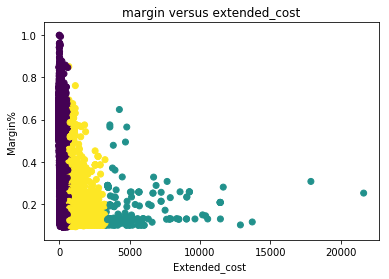

centroids are : [[  118.62621071]
 [ 3322.23136598]
 [  891.62071309]
 [ 9471.65181818]]
min of each bin : labels_3bins
0       0.02
1    2109.45
2     505.34
3    6535.98
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      504.64
1     6350.45
2     2090.65
3    21634.12
Name: Extended_cost , dtype: float64
Average of each bin for 4 bins: labels_3bins
0    0.445989
1    0.177269
2    0.204847
3    0.193916
Name: Margin%, dtype: float64
Variance within each bin for 4 bins: labels_3bins
0    0.044464
1    0.007807
2    0.012351
3    0.004209
Name: Margin%, dtype: float64
Average of within bins variance for 4 bins: 0.017207811801
Average of difference between bins for 4 bins: 0.102409628487


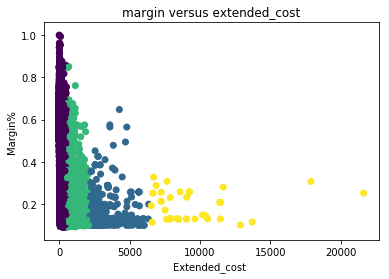

centroids are : [[   77.89983292]
 [ 3974.514875  ]
 [ 1518.45581694]
 [ 9913.65736842]
 [  539.81093593]]
min of each bin : labels_3bins
0       0.02
1    2751.85
2    1030.20
3    7230.00
4     309.50
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      308.82
1     6880.20
2     2738.34
3    21634.12
4     1028.88
Name: Extended_cost , dtype: float64
Average of each bin for 5 bins: labels_3bins
0    0.478763
1    0.177839
2    0.187887
3    0.186932
4    0.214261
Name: Margin%, dtype: float64
Variance within each bin for 5 bins: labels_3bins
0    0.040054
1    0.008789
2    0.008638
3    0.003758
4    0.014531
Name: Margin%, dtype: float64
Average of within bins variance for 5 bins: 0.0151541045418
Average of difference between bins for 5 bins: 0.0848135370969


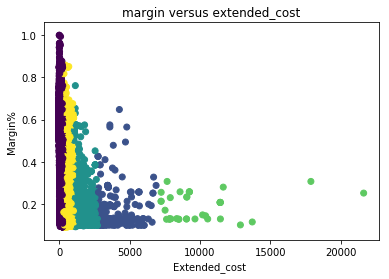

centroids are : [[   74.9057706 ]
 [ 4326.92857955]
 [ 1122.12350614]
 [ 9913.65736842]
 [  481.76567187]
 [ 2271.25697201]]
min of each bin : labels_3bins
0       0.02
1    3326.72
2     804.82
3    7230.00
4     279.10
5    1697.56
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      277.90
1     6880.20
2     1686.58
3    21634.12
4      800.93
5     3250.53
Name: Extended_cost , dtype: float64
Average of each bin for 6 bins: labels_3bins
0    0.482102
1    0.177555
2    0.198379
3    0.186932
4    0.215922
5    0.186265
Name: Margin%, dtype: float64
Variance within each bin for 6 bins: labels_3bins
0    0.039409
1    0.009078
2    0.012532
3    0.003758
4    0.015116
5    0.006958
Name: Margin%, dtype: float64
Average of within bins variance for 6 bins: 0.0144750590921
Average of difference between bins for 6 bins: 0.0790929936154


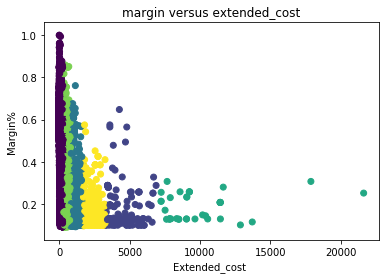

centroids are : [[    76.53357037]
 [  2703.16028754]
 [  9366.70166667]
 [   503.20420331]
 [  4710.62210084]
 [  1238.61021137]
 [ 19758.86      ]]
min of each bin : labels_3bins
0        0.02
1     1987.20
2     7230.00
3      291.20
4     3742.56
5      872.70
6    17883.60
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      287.85
1     3665.00
2    13715.70
3      870.10
4     6880.20
5     1955.16
6    21634.12
Name: Extended_cost , dtype: float64
Average of each bin for 7 bins: labels_3bins
0    0.479810
1    0.180112
2    0.181761
3    0.216718
4    0.167649
5    0.196607
6    0.280019
Name: Margin%, dtype: float64
Variance within each bin for 7 bins: labels_3bins
0    0.039869
1    0.007271
2    0.003406
3    0.015267
4    0.008589
5    0.011206
6    0.001526
Name: Margin%, dtype: float64
Average of within bins variance for 7 bins: 0.0124477231864
Average of difference between bins for 7 bins: 0.0829571595559


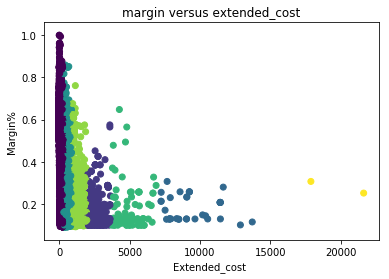

centroids are : [[   294.91252995]
 [  2775.30435088]
 [  9242.44457143]
 [  1342.89775046]
 [    50.07735619]
 [   650.29782823]
 [  4718.82601695]
 [ 17744.47333333]]
min of each bin : labels_3bins
0      172.66
1     2062.48
2     7230.00
3      996.77
4        0.02
5      472.80
6     3780.08
7    13715.70
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      472.51
1     3742.56
2    12873.18
3     2054.40
4      172.46
5      996.25
6     6880.20
7    21634.12
Name: Extended_cost , dtype: float64
Average of each bin for 8 bins: labels_3bins
0    0.237679
1    0.182633
2    0.183651
3    0.188969
4    0.520966
5    0.209407
6    0.168220
7    0.225219
Name: Margin%, dtype: float64
Variance within each bin for 8 bins: labels_3bins
0    0.021160
1    0.007467
2    0.003374
3    0.009215
4    0.031463
5    0.013352
6    0.008623
7    0.009772
Name: Margin%, dtype: float64
Average of within bins variance for 8 bins: 0.0130534298847
Average of difference between bi

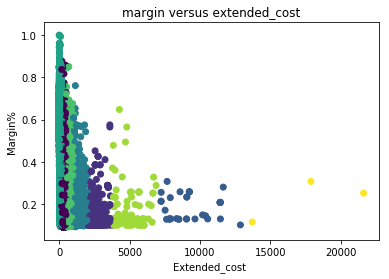

centroids are : [[    42.95611185]
 [  3899.21586592]
 [   556.31965744]
 [ 10579.879     ]
 [  1155.09110182]
 [  6684.75190476]
 [  2197.81486339]
 [ 19758.86      ]
 [   241.08692066]]
min of each bin : labels_3bins
0        0.02
1     3059.40
2      398.93
3     9041.30
4      857.24
5     5336.90
6     1685.78
7    17883.60
8      142.09
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      142.01
1     5198.00
2      852.71
3    13715.70
4     1664.84
5     8583.31
6     3013.50
7    21634.12
8      398.30
Name: Extended_cost , dtype: float64
Average of each bin for 9 bins: labels_3bins
0    0.535328
1    0.174145
2    0.211056
3    0.186230
4    0.197716
5    0.175383
6    0.188521
7    0.280019
8    0.255089
Name: Margin%, dtype: float64
Variance within each bin for 9 bins: labels_3bins
0    0.027902
1    0.008915
2    0.013759
3    0.003292
4    0.012523
5    0.004532
6    0.007087
7    0.001526
8    0.025506
Name: Margin%, dtype: float64
Average of within

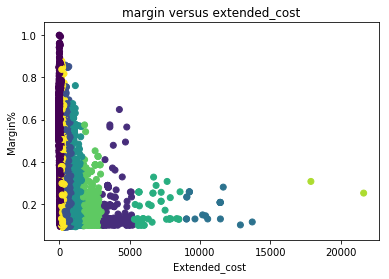

centroids are : [[   223.16578623]
 [  2519.97566406]
 [  6787.00615385]
 [   839.6105303 ]
 [  4068.29980392]
 [ 19758.86      ]
 [   482.77534332]
 [    41.79768104]
 [  1401.04045564]
 [ 10579.879     ]]
min of each bin : labels_3bins
0      132.50
1     1987.20
2     5563.93
3      661.50
4     3326.72
5    17883.60
6      353.04
7        0.02
8     1123.20
9     9041.30
Name: Extended_cost , dtype: float64
max of each bin : labels_3bins
0      352.85
1     3250.53
2     8583.31
3     1119.24
4     5392.54
5    21634.12
6      660.55
7      132.45
8     1955.16
9    13715.70
Name: Extended_cost , dtype: float64
Average of each bin for 10 bins: labels_3bins
0    0.263853
1    0.176077
2    0.177195
3    0.213443
4    0.177502
5    0.280019
6    0.212118
7    0.537149
8    0.187701
9    0.186230
Name: Margin%, dtype: float64
Variance within each bin for 10 bins: labels_3bins
0    0.027244
1    0.006693
2    0.004757
3    0.014599
4    0.009629
5    0.001526
6    0.014661
7    0.02751

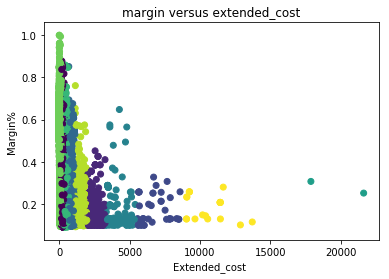

In [40]:
#creating a dataframe to store the descriptive statistics of different models
Column=[]
Column.append('number of clusters')
Column.append('average of difference between bins')
Column.append('average of within bins variance')
df = pd.DataFrame(columns=Column)
for i in range(3,11):
    AvgOfdiff_between_bins , averageOfVariance = kmeans_clustering (i)
    data=[]
    data.append(i)
    data.append(AvgOfdiff_between_bins )
    data.append(averageOfVariance)
    df.loc[i-3] = data


   number of clusters  average of difference between bins  \
0                 3.0                            0.138072   
1                 4.0                            0.102410   
2                 5.0                            0.084814   
3                 6.0                            0.079093   
4                 7.0                            0.082957   

   average of within bins variance  
0                         0.021842  
1                         0.017208  
2                         0.015154  
3                         0.014475  
4                         0.012448  


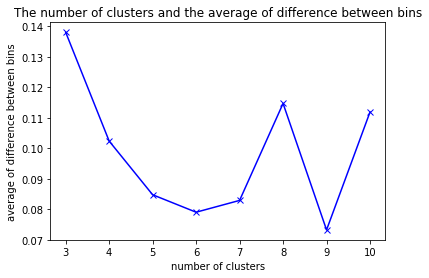

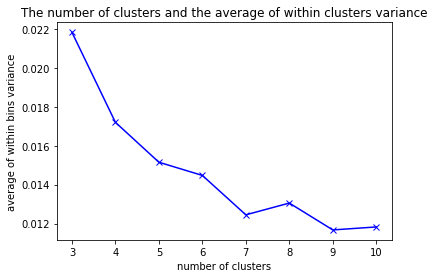

In [41]:
# deciding the number of bins for clustering
print df.head()
#the following plot shows the changes of the average of difference between average margins across the bins for different number of clusters in kmeans algorithm
plt.plot(df['number of clusters'], df['average of difference between bins'], 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('average of difference between bins')
plt.title('The number of clusters and the average of difference between bins')
plt.show()

#the following plot shows the changes of the average of within bins variance for different number of clusters in Kmeans algorithm
plt.plot(df['number of clusters'], df['average of within bins variance'], 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('average of within bins variance')
plt.title('The number of clusters and the average of within clusters variance')
plt.show()


According to these plots, since we want to maximize the difference of the average margins and minimize the within bins variance, numberOfBins = 8 seems to be a good choice. So we choose 8 bins for clustering the extended cost [0, 172.56 ] , [172.56, 472.655] , [472.655, 996.51], [996.51, 2062.48] , [2062.48, 3780.08] , [3780.08, 7055.1] , [7055.1, 13715.7] , [13715.7, 21634.12]


# Determining the column that would help differentiate the margins
In this section, first I plotted the scatter plot of margins vs different columns of the dataset to get a sense of their relationship. If there is a good linear relationship between margins and one of the columns of the dataset, then clustering that column can definitely help differentiate the margins. 


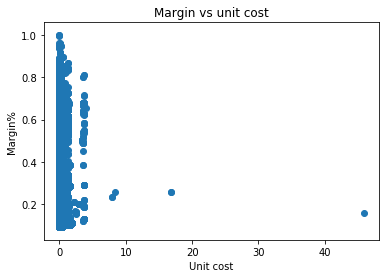

In [183]:
# scatter plot of unit cost and margin%
import matplotlib.pyplot as plt
plt.scatter(myDataframe['Unit_cost'] , myDataframe['Margin%'])
plt.xlabel("Unit cost")
plt.ylabel("Margin%")
plt.title("Margin vs unit cost")
plt.show()

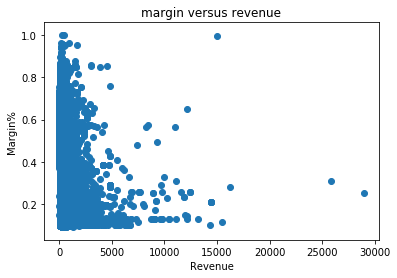

In [184]:
# scatter plot of margin versus revenue
import matplotlib.pyplot as plt
plt.scatter(myDataframe['Revenue'] , myDataframe['Margin%'])
plt.xlabel("Revenue")
plt.ylabel("Margin%")
plt.title("margin versus revenue")
plt.show()

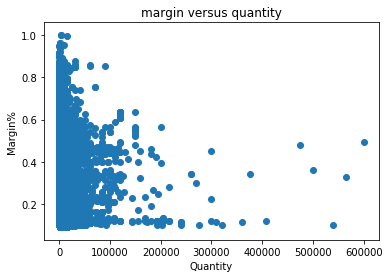

In [185]:
# scatter plot of margin and quantity
import matplotlib.pyplot as plt
plt.scatter(myDataframe['Quantity'] , myDataframe['Margin%'])
plt.xlabel("Quantity")
plt.ylabel("Margin%")
plt.title("margin versus quantity")
plt.show()

Since the scatter plots cannot give us much information about which column should be used to differentiate the margins, I used another approach.
I clustered the margins with kmeans algorithm and found the labels(clusters). Then I used 'Revenue' , 'Unit_cost' and 'Quantity' seperately to predict those labels using Random forest classification algorithm. The column that can better predict the labels(higher accuracy) would be chosen as the column that can be used to differentiate margins.  

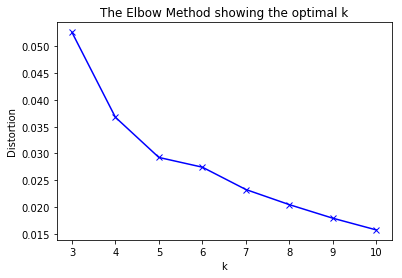

In [187]:
# clustering Margins with k means algorithm and finding the optimal number of clusters with elbow method 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

Y= np.array(myDataframe['Margin%'])
X=Y.reshape(-1, 1)

n_cluster = range(3,11)
distortions = []
for k in n_cluster:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the different k for elbow method  
plt.plot(n_cluster, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


According to this plot, when K(number of clusters) increases, the centroids are closer to the clusters centroids.
The improvements will decline, at some point rapidly, creating the elbow shape. This point would be the best point for the clustering algorithm. After running kMeans algorithm and plotting the above shape, we can conclude that 5 is the best number of clusters, because after 5 the improvement in the clustering would decrease .So in the next section, we would run the kMeans clustering algorithm on the Margins with (number of clusters = 5) to define the labels.

In [188]:
# clustering Margins with k-means algorithm(n=5) and finding the labels for doing the classification 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

Y= np.array(myDataframe['Margin%'])
X=Y.reshape(-1, 1)

kmeanModel = KMeans(n_clusters=5).fit(X)
kmeanModel = kmeanModel.fit(X)
# Getting the cluster labels
labels = kmeanModel.predict(X)

# adding the labels column to the dataframe
myDataframe['labels_Margin'] = labels

Now we would run a classification algorithm (random forest which works well for most of the classification algorithms), each time we would consider different columns (including 'revenue', 'unit_cost'and 'quantity') to find the column that can best classify the labels which are found for clustering the margins.

In [192]:
# writing a function to classify the labels (which are defined by clustering the margins) using different feastures as inputs
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import accuracy_score

def RandomForest_classification (column_name):
    x = []
    y = []
    #column name is the feature for classification
    for i in myDataframe[column_name]:
        x.append(np.array(i))
    #labels_margin is the target variable    
    for j in myDataframe['labels_Margin']:
        y.append(j)

    X_matrix = np.matrix(np.array(x))
    X = X_matrix.transpose()
    X = np.array(X)
    Y = np.array(y)

    rfc = RandomForestClassifier()

    param_grid = {'max_depth': [2,4,6,8,10,12]
                            ,"min_samples_split" :[2,3,4,5,6]
                            ,"min_samples_leaf": [1,3,5]}

    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
    CV_rfc.fit(X,Y)

    print "The Accuracy score for classification using "+ str(column_name) + " as the input feature is: " + str(CV_rfc.best_score_)

    


In [193]:
RandomForest_classification ('Unit_cost')
RandomForest_classification ('Revenue')
RandomForest_classification ('Quantity')
RandomForest_classification ('Extended_cost ')

The Accuracy score for classification using Unit_cost as the input feature is: 0.556488631107
The Accuracy score for classification using Revenue as the input feature is: 0.632138917553
The Accuracy score for classification using Quantity as the input feature is: 0.497455787638
The Accuracy score for classification using Extended_cost  as the input feature is: 0.576949080169


According to the accuracy score that is calculated by the random forest algorithm, we conclude that clustering the Revenue is the best way to differentiate the extended cost. 